In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set()

In [2]:
# loading syrvey data and descriptive schema 
df = pd.read_csv('..\Data\survey-results-public.csv')
schema = pd.read_csv('..\Data\survey-results-schema.csv')

#### 1. How to break into the field ?
- Analyzing the most common ways for breaking into data science fields 

In [3]:
df['CousinEducationList'] = df['CousinEducation'].str.split(';')
df_exploded =df.explode('CousinEducationList') 
df_exploded['CousinEducationList'] = df_exploded['CousinEducationList'].explode().str.replace(' ', '')


In [5]:
# df_exploded['CousinEducationList'].value_counts()

In [ ]:
sns.set()
# df['CousinEducationList'] = df['CousinEducation'].str.split(';')
# df_exploded['CousinEducationList_exploded'] = df['CousinEducationList'].explode().str.replace(' ', '')
plt.figure(figsize=(8,5))
(df['CousinEducationList'].explode().str.replace(' ', '').value_counts(normalize=True)*100).plot(kind = 'bar' )

In [ ]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    try: 
        desc =  schema[schema['Column']== column_name]['Question'].values[0]
    except: 
        print(column_name + ' is not found in schema!')
    return desc

#### 2.0 Analyzing Bootcamp grads in terms of job placements and Salary

In [ ]:
# df_bootcamp = df_exploded[df_exploded['CousinEducationList']=='Bootcamp']
sum(df_bootcamp['Gender'].isnull())

In [ ]:
df_bootcamp  = df[df['TimeAfterBootcamp'].isnull()==False]
df_not_bootcamp  = df[df['TimeAfterBootcamp'].isnull()==True]
(df_bootcamp['Gender'].value_counts()/(df_bootcamp.shape[0] - sum(df_bootcamp['Gender'].isnull()))).sort_values().plot(kind = 'barh')

In [ ]:
df_bootcamp['TimeAfterBootcamp'].value_counts()/(df_bootcamp.shape[0] - sum(df_bootcamp['TimeAfterBootcamp'].isnull()))

In [ ]:
df_bootcamp['Salary'].plot(kind = 'hist')

#### 3.0 Analyzing Job Satisfaction 

In [ ]:
df.groupby('EmploymentStatus').mean()['JobSatisfaction']

In [ ]:
plt.figure()
df.groupby('CompanySize').mean()['JobSatisfaction'].sort_values().plot(kind = 'barh')

In [ ]:
df.groupby(['ProgramHobby']).mean()['JobSatisfaction'].sort_values().dropna().plot(kind = 'barh')

In [ ]:
df.groupby(['HomeRemote']).mean()['JobSatisfaction'].sort_values().dropna().plot(kind = 'barh').plot(kind = 'barh')

In [ ]:
res = df.groupby(['FormalEducation']).mean()['JobSatisfaction'].sort_values().dropna()
res.dropna().plot(kind = 'barh')

#### 4.0 Predicting Salary 


In [ ]:
# calculating how many columns have missing values 
df.isnull().sum()/df.shape[0]*100

In [ ]:
df.hist(); 

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [ ]:
cols_num = ['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']
df_num = df[cols_num]
df_num = df_num.fillna(df_num.mean())
df_num.head()

#### 4.1 Evaluating Numerical Variables 


In [16]:
# df_exploded = df_exploded.dropna(subset  = ['Salary'], axis = 0)
# excl_cols = list(df_exploded.columns[df_exploded.isnull().sum()/df_exploded.shape[0]*100> 50])
# cols  = [ x for x in list(df_exploded.columns) if x not in excl_cols  ]
# df_exploded = df_exploded[cols]
num_cols = df_exploded.select_dtypes(include = ['float', 'int']).columns 
X_num = df_exploded[num_cols].drop('Salary', axis = 1)
X_num = X_num.fillna(X_num.mean())
cat_cols = df_exploded.select_dtypes(include = ['object']).columns
X_cat = df_exploded[cat_cols]
X_cat = X_cat.fillna(X_cat.mode())
# cat_cols

In [19]:
X = pd.concat([X_num, X_cat], axis = 1)

In [21]:
# X_ = pd.get_dummies(X, prefix_sep='_', drop_first=True)
# X_.head()
y = df_exploded['Salary']

#### 4.3 Training and Evaluating Model

In [79]:
def evaluate_model(X_, y_):
    feat_size = X_.shape[0]
    r2_train = []
    r2_test  = []
    models   = []
    for size in feat_size: 
        X_train, X_test, y_train, y_test = train_test_split(X_[X_.columns[:size]], y, test_size = .30, random_state=42)

        #Instantiate
        lm_model = LinearRegression(normalize=True) 
        #Fit - why does this break?
        lm_model.fit(X_train, y_train) 
        y_predicted_train = lm_model.predict(X_train)
        y_predicted_test  = lm_model.predict(X_test)
        r2_train.append(r2_score(y_train, y_predicted_train))
        r2_test.append(r2_score(y_test, y_predicted_test))
    
    return feat_size, r2_train, r2_test

In [80]:
feat_size, r2_train, r2_test = evaluate_model(X_[X_.columns[:3]], y)

TypeError: 'int' object is not iterable

In [75]:
X_[X_.columns[:300]].head()

,CareerSatisfaction,JobSatisfaction,StackOverflowSatisfaction,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",Country_Albania,Country_Anguilla,Country_Argentina,Country_Armenia,...,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Database administrator,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Database administrator; Other,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Database administrator; Systems administrator; DevOps specialist,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Desktop applications developer,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Desktop applications developer; Database administrator,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Desktop applications developer; Database administrator; Systems administrator,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Desktop applications developer; Database administrator; Systems administrator; DevOps specialist,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Desktop applications developer; Database administrator; Systems administrator; Quality assurance engineer,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Desktop applications developer; Other,DeveloperType_Developer with a statistics or mathematics background; Data scientist; Desktop applications developer; Systems administrator
2,8.0,9.0,8.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,8.0,8.0,8.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,9.0,8.0,8.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,5.0,3.0,8.527079,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,5.0,3.0,8.527079,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


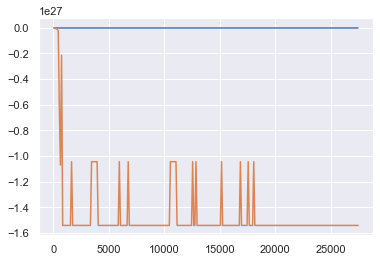

In [77]:
plt.figure()
plt.plot(feat_size, r2_train, label = 'train')
plt.plot(feat_size, r2_test, label = 'test')
